<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf

## Creating new data to view it

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

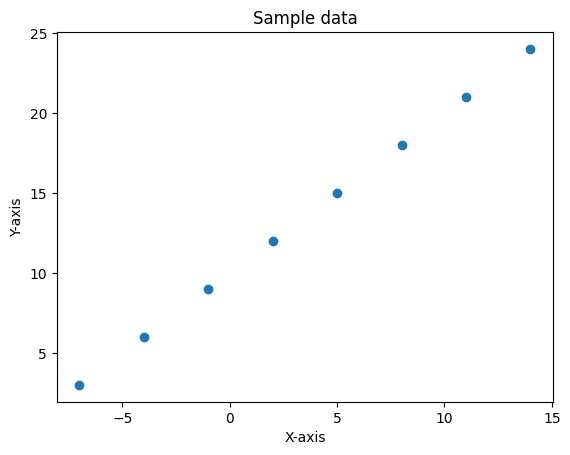

In [3]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [4]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [6]:
X[0].ndim # this shows that it is a scalar

0

In [7]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [8]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [9]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.0137 - mae: 12.0137
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 11.8812 - mae: 11.8812
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 11.7487 - mae: 11.7487
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 11.6162 - mae: 11.6162
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 11.4837 - mae: 11.4837


In [11]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


array([[10.244312]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

## Improving the model only by increasing the epoch number

In [12]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_epoch = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_epoch.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_epoch.fit(tf.expand_dims(X, axis=-1),y,epochs=100) # Since i have not proved the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.5000 - mae: 7.5000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 7.4944 - mae: 7.4944
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 7.4887 - mae: 7.4887
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 7.4831 - mae: 7.4831
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 7.4775 - mae: 7.4775
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 7.4719 - mae: 7.4719
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4662 - mae: 7.4662
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.4606 - mae: 7.4606
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.4550 - mae: 7.4550
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.4494 - mae: 7.4494
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4437 - mae: 7.4437
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.4381 - mae: 7.4381
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/

In [13]:
chumma = tf.constant([[17.0]])
model_epoch.predict(chumma) # this is when the epochs was 100, has a MAE of 6.8306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[30.143173]], dtype=float32)

## Improving with another hidden layer

In [14]:
model_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_layer.compile(loss = tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

model_layer.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - loss: 13.0355 - mae: 13.0355
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.5693 - mae: 12.5693
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.0995 - mae: 12.0995
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.6238 - mae: 11.6238
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.1524 - mae: 11.1524
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.6615 - mae: 10.6615
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.1495 - mae: 10.1495
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6129 - mae: 9.6129
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0642 - mae: 9.0642
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5115 - mae: 8.5115
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.9183 - mae: 7.9183
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.2901 - mae: 7.2901
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [15]:
model_layer.predict(tf.constant([17.0])) # we can see how much our MAE has improved from when we had only 1 layer.
# Even though the MAE is better, the prediction is worse than the previous one.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[31.147898]], dtype=float32)

So, what might be happening in the above case where the training metric has improved but the prediction has worsened is that by increasing the number of layers or increasing the neurons per layer we are over fitting the data and that may cause the prediction value to be worse than before.

Note - The learning rate is the most important hyperparameter that we can change to improve our model.

# Evaluating models

In [16]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [17]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Visualizing the data

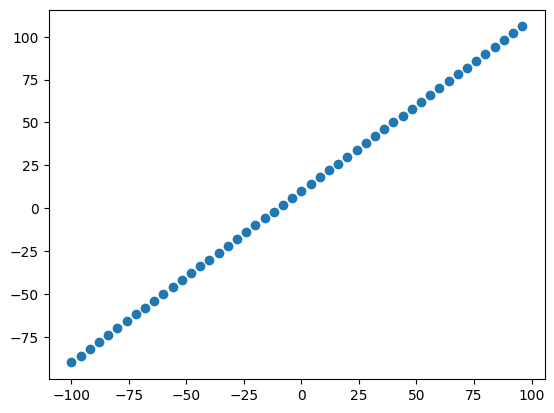

In [18]:
plt.scatter(X,y)

In [19]:
# Splitting the dataset
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

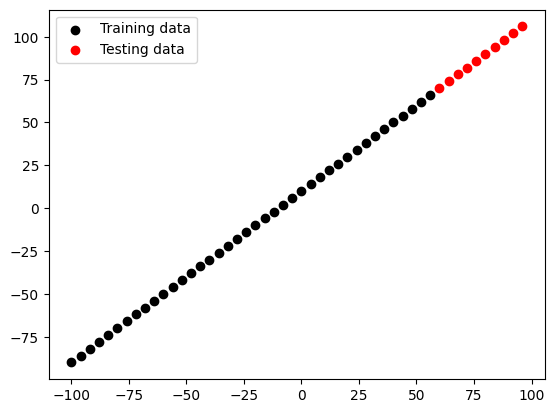

In [20]:
### Vizualizing the training data
plt.scatter(X_train,y_train,c="black",label="Training data")

### Vizualizing the testing data
plt.scatter(X_test,y_test,c="r",label="Testing data")

plt.legend()
plt.show()

In [21]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

## Vizualizing the model

In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** = total number of parameters in the model.
* **Trainable params** = total number of parameters that the model can update as it trains.
* **Non-trainable params** = these are the parameters that the model cant update as these are from an imported model which is already trained. imported models are mostly used during **transfer learning**.

In [23]:
# 3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

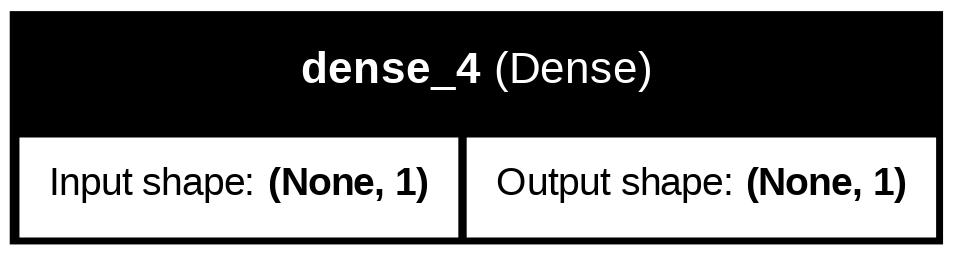

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,show_layer_names = True)

## Visulaizing the model Predictions

In [25]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[55.603096],
       [59.216805],
       [62.830513],
       [66.44422 ],
       [70.05792 ],
       [73.67163 ],
       [77.28534 ],
       [80.89904 ],
       [84.51275 ],
       [88.12646 ]], dtype=float32)

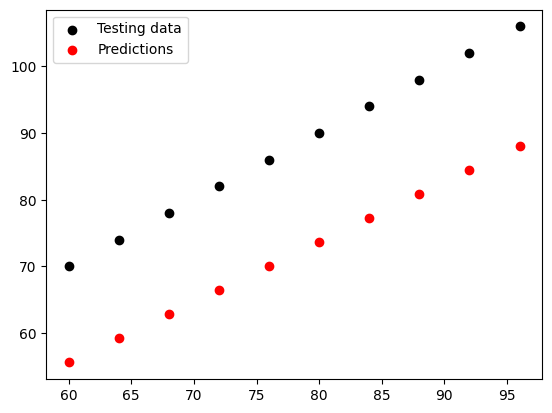

In [26]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.legend()
plt.show()

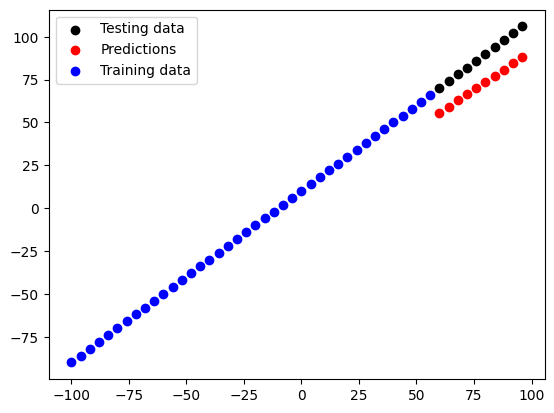

In [27]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.scatter(X_train,y_train,c="blue",label="Training data")
plt.legend()
plt.show() # shitty ass model

## Evaluations metrics

### MAE

In [28]:
y_test.shape, y_pred.shape

((10,), (10, 1))

In [29]:
mae = tf.keras.losses.MeanAbsoluteError()
mae_value = mae.call(y_test,y_pred)
mae_value

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.396904 , 14.7831955, 15.169487 , 15.5557785, 15.942078 ,
       16.32837  , 16.71466  , 17.10096  , 17.487251 , 17.873543 ],
      dtype=float32)>

In [30]:
# changing the shape to get 1 value
y_pred = tf.squeeze(y_pred)

In [31]:
mae_value = mae(y_test,y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=16.135223388671875>

### MSE

In [32]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test,y_pred)
mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=261.5765075683594>

## Running experiments to improve our model

### Simple model with one layer and 100 epochs

In [33]:
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [34]:
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fitting the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 62.2193 - mae: 62.2193 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 27.5469 - mae: 27.5469
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.3023 - mae: 10.3023
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.0815 - mae: 12.0815
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.6753 - mae: 12.6753
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.2023 - mae: 8.2023
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.8538 - mae: 8.8538 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.8083 - mae: 7.8083
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.7665 - mae: 10.7665
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.6147 - mae: 7.6147
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.9386 - mae: 11.9386 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1203 - mae: 8.1203
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [35]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[53.262283],
       [56.720352],
       [60.17842 ],
       [63.63649 ],
       [67.09456 ],
       [70.55263 ],
       [74.0107  ],
       [77.468765],
       [80.926834],
       [84.3849  ]], dtype=float32)

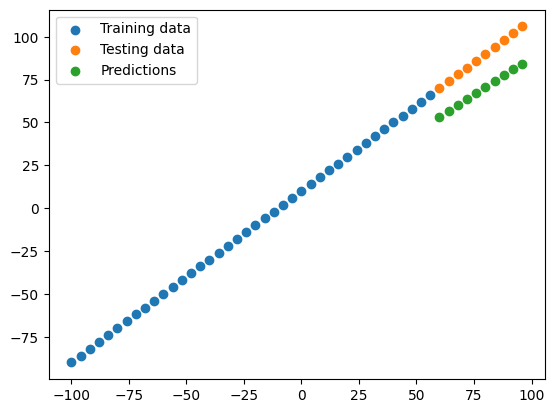

In [36]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_1,label="Predictions")
plt.legend()
plt.show()

In [37]:
mae_val_1 = mae(y_test,tf.squeeze(y_pred_1))
mae_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=19.176406860351562>

In [38]:
mse_val_1 = mse(y_test,tf.squeeze(y_pred_1))
mse_val_1

<tf.Tensor: shape=(), dtype=float32, numpy=370.15753173828125>

### model with 2 layers and 100 epochs

In [39]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# 3. fitting the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 28.6041 - mae: 28.6041 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 24.0737 - mae: 24.0737
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.1809 - mae: 23.1809
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.9062 - mae: 13.9062
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 19.0509 - mae: 19.0509
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.0673 - mae: 13.0673
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.9726 - mae: 14.9726
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.6320 - mae: 15.6320
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.5941 - mae: 11.5941
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.4237 - mae: 14.4237
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.0298 - mae: 11.0298
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.8627 - mae: 14.8627
Epoch 13/100
2/2 ━━━━━━━

In [40]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[37.097115],
       [39.464172],
       [41.83123 ],
       [44.198288],
       [46.565342],
       [48.932392],
       [51.299454],
       [53.666508],
       [56.033566],
       [58.400623]], dtype=float32)

In [41]:
mae_val_2 = mae(y_test,tf.squeeze(y_pred_2))
mse_val_2 = mse(y_test,tf.squeeze(y_pred_2))
mae_val_2,mse_val_2

(<tf.Tensor: shape=(), dtype=float32, numpy=40.251129150390625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1642.15234375>)

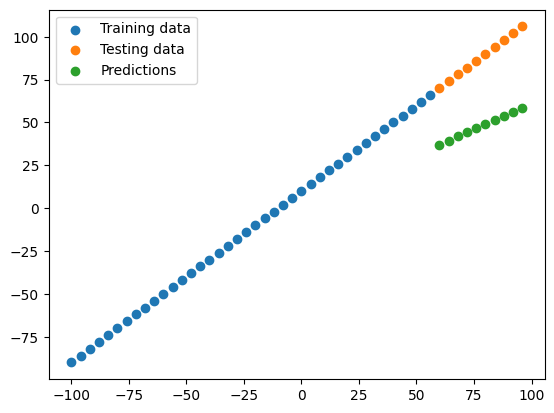

In [42]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_2,label="Predictions")
plt.legend()
plt.show()

### TW0 layers trained for 500 epochs

In [43]:
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 55.9726 - mae: 55.9726 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 26.8884 - mae: 26.8884
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.8151 - mae: 23.8151
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.6791 - mae: 19.6791
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.6047 - mae: 17.6047
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.6054 - mae: 16.6054
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7840 - mae: 11.7840
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.5021 - mae: 14.5021
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.9112 - mae: 15.9112
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9301 - mae: 11.9301
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.9139 - mae: 14.9139
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9810 - mae: 10.9810
Epoch 13/500
2/2 ━━━━━━━

In [44]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[42.839813],
       [45.27079 ],
       [47.70178 ],
       [50.132755],
       [52.563744],
       [54.994728],
       [57.425713],
       [59.856697],
       [62.28768 ],
       [64.718666]], dtype=float32)

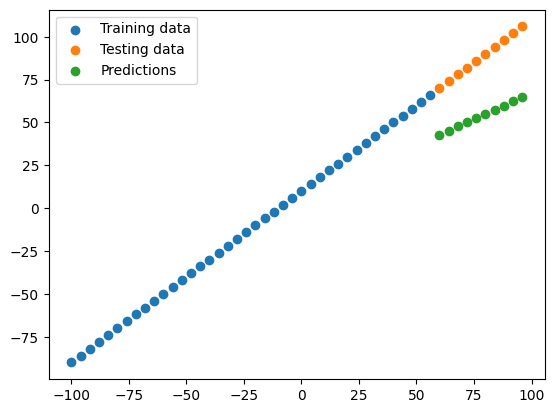

In [45]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_pred_3,label="Predictions")
plt.legend()
plt.show()

In [46]:
mae_val_3 = mae(y_test,y_pred_3)
mse_val_3 = mse(y_test,y_pred_3)
mae_val_3,mse_val_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.22076416015625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1191.3704833984375>)

## Comparing the results of our models

In [54]:
import pandas as pd
data = [["model_1",mae_val_1.numpy(),mse_val_1.numpy()],
 ["model_2",mae_val_2.numpy(),mse_val_2.numpy()],["model_3",mae_val_3.numpy(),mse_val_3.numpy()]]

df = pd.DataFrame(data,columns=["Model","MAE","MSE"])
df

,Model,MAE,MSE
0,model_1,19.176407,370.157532
1,model_2,40.251129,1642.152344
2,model_3,34.220764,1191.370483


In [55]:
# Looks like model 1 is the best performing model in this scenario
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Saving out models
* Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

* You can save a TensorFlow/Keras model using model.save().

* There are two ways to save a model in TensorFlow:
    1. The SavedModel format (default).
    2. The HDF5 format.

Usind the HDF5 format stores the data in a universal format

In [62]:
# Using the HDF5 standard
model_1.save("model_1_demo.h5")

## Loading the Model

In [64]:
loaded_model_1 = tf.keras.models.load_model("/content/model_1_demo.h5")
loaded_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Compare model_1 predictions with loaded model_1 predictions

In [65]:
model_1_preds = model_1.predict(X_test)
loaded_model_1_preds = loaded_model_1.predict(X_test)
model_1_preds == loaded_model_1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
model_1_mae = mae(model_1_preds,y_test)
loaded_model_1_mae = mae(loaded_model_1_preds,y_test)
model_1_mae,loaded_model_1_mae

(<tf.Tensor: shape=(), dtype=float32, numpy=19.176406860351562>,
 <tf.Tensor: shape=(), dtype=float32, numpy=19.176406860351562>)